In [1]:
import os

import pandas               as pd 
import numpy                as np 

import matplotlib.pyplot as plt

In [2]:
file_path = os.path.dirname(os.getcwd())

hour    = pd.read_csv(file_path + r'\Dados\hour.csv')

hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [3]:
hour = hour.drop(columns=['dteday','instant', 'yr', 'mnth', 'holiday','weekday', 'atemp', 'hum', 'windspeed', 'cnt'])

In [4]:
hour = hour[hour['weathersit'] != 4]

<Axes: xlabel='workingday'>

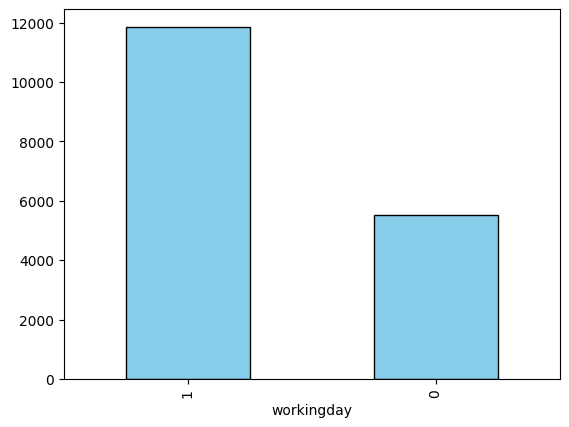

In [5]:
weathersit_counts = hour['workingday'].value_counts()

weathersit_counts.plot.bar(color='skyblue', edgecolor='black')

In [6]:
workingday_0 = hour[hour['workingday'] == 0]
workingday_1 = hour[hour['workingday'] == 1]

workingday_0 = workingday_0.sample(len(workingday_0)*2, replace=True)

hour = pd.concat([workingday_0, workingday_1, hour[hour['weathersit'] == 0]])

<Axes: xlabel='workingday'>

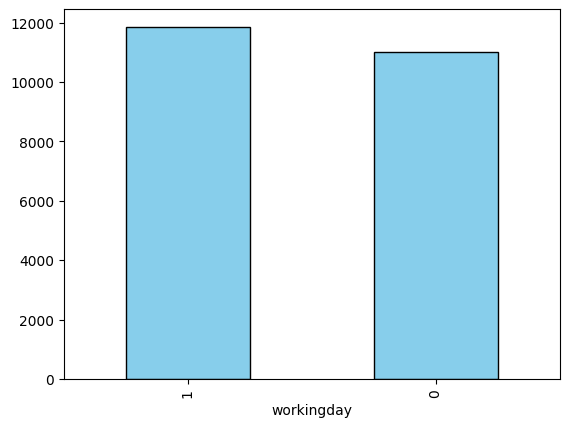

In [7]:
weathersit_counts = hour['workingday'].value_counts()

weathersit_counts.plot.bar(color='skyblue', edgecolor='black')

<Axes: xlabel='weathersit'>

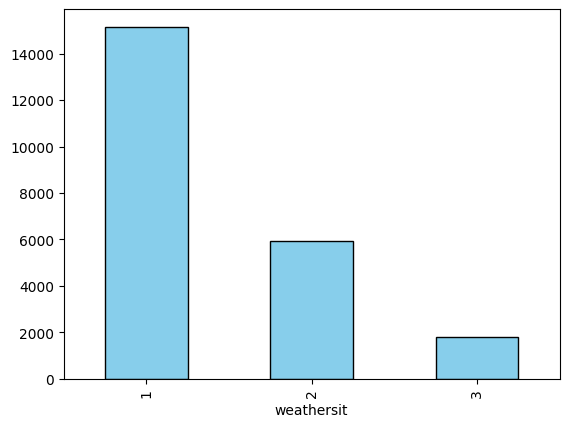

In [8]:
weathersit_counts = hour['weathersit'].value_counts()

weathersit_counts.plot.bar(color='skyblue', edgecolor='black')

In [9]:
ensolarados = hour[hour['weathersit'] == 1]
chuvosos = hour[hour['weathersit'] == 3]

chuvosos_boosted = chuvosos.sample(len(chuvosos) * 2, replace=True)

hour = pd.concat([ensolarados, chuvosos_boosted, hour[hour['weathersit'] == 2]])

<Axes: xlabel='weathersit'>

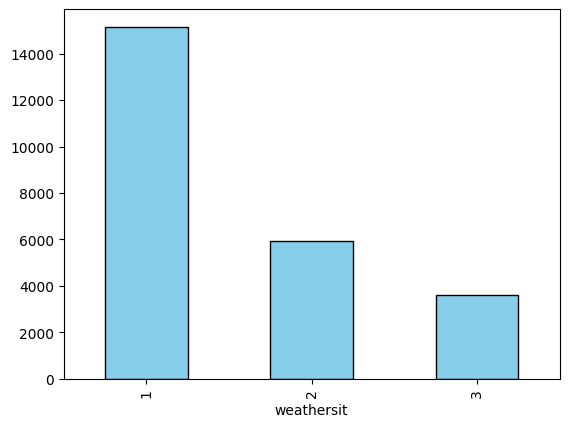

In [10]:
weathersit_counts = hour['weathersit'].value_counts()

weathersit_counts.plot.bar(color='skyblue', edgecolor='black')

In [11]:
hour

,season,hr,workingday,weathersit,temp,casual,registered
366,1,18,0,1,0.20,11,56
6786,4,8,0,1,0.46,24,101
6295,4,21,0,1,0.62,66,156
1598,1,2,0,1,0.24,0,14
2773,2,11,0,1,0.50,120,201
...,...,...,...,...,...,...,...
17371,1,16,1,2,0.26,30,184
17372,1,17,1,2,0.26,14,150
17373,1,18,1,2,0.26,10,112
17374,1,19,1,2,0.26,11,108


In [12]:
hour = pd.concat([hour, pd.get_dummies(hour['weathersit'], prefix='weathersit', drop_first=True)], axis=1).drop(columns='weathersit')
hour = pd.concat([hour, pd.get_dummies(hour['season'], prefix='season', drop_first=True)], axis=1).drop(columns='season')

In [13]:
hour

,hr,workingday,temp,casual,registered,weathersit_2,weathersit_3,season_2,season_3,season_4
366,18,0,0.20,11,56,False,False,False,False,False
6786,8,0,0.46,24,101,False,False,False,False,True
6295,21,0,0.62,66,156,False,False,False,False,True
1598,2,0,0.24,0,14,False,False,False,False,False
2773,11,0,0.50,120,201,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...
17371,16,1,0.26,30,184,True,False,False,False,False
17372,17,1,0.26,14,150,True,False,False,False,False
17373,18,1,0.26,10,112,True,False,False,False,False
17374,19,1,0.26,11,108,True,False,False,False,False


In [14]:
hour.to_csv(file_path + r'\Dados\hour_tratado.csv', index=False)

In [15]:
Y_casual        = np.array(hour.pop('casual'))
Y_registered    = np.array(hour.pop('registered'))
X               = np.array(hour)